## Objective:

With 20,000+ observations, the objective is to not only learn the patterns and trends in chess games played by individuals ranging from Novice players all the way to Grand Masters, but to also analyze piece movements, classify aggressive and defensive players amongst both white and black players. The dataset has been collected from users of Lichess.org.

## Variables:

Game ID;

Rated (T/F);

Start Time;

End Time;

Number of Turns;

Game Status;

Winner;

Time Increment;

White Player ID;

White Player Rating;

Black Player ID;

Black Player Rating;

All Moves in Standard Chess Notation;

Opening Eco (Standardised Code/Notation for any given opening);

Opening Name;

Opening Ply (Number of moves in the opening phase)

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd

chess_games = pd.read_csv('/content/drive/MyDrive/Chess/games.csv')
chess_games.head()

,id,rated,created_at,last_move_at,turns,victory_status,winner,increment_code,white_id,white_rating,black_id,black_rating,moves,opening_eco,opening_name,opening_ply
0,TZJHLljE,False,1.504210e+12,1.504210e+12,13,outoftime,white,15+2,bourgris,1500,a-00,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,Slav Defense: Exchange Variation,5
1,l1NXvwaE,True,1.504130e+12,1.504130e+12,16,resign,black,5+10,a-00,1322,skinnerua,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,B00,Nimzowitsch Defense: Kennedy Variation,4
2,mIICvQHh,True,1.504130e+12,1.504130e+12,61,mate,white,5+10,ischia,1496,a-00,1500,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...,C20,King's Pawn Game: Leonardis Variation,3
3,kWKvrqYL,True,1.504110e+12,1.504110e+12,61,mate,white,20+0,daniamurashov,1439,adivanov2009,1454,d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...,D02,Queen's Pawn Game: Zukertort Variation,3
4,9tXo1AUZ,True,1.504030e+12,1.504030e+12,95,mate,white,30+3,nik221107,1523,adivanov2009,1469,e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...,C41,Philidor Defense,5


In [3]:
#Dropping columns I think will be unnecessary in my Analysis

chess_games = chess_games.drop(columns = ['created_at', 'rated', 'last_move_at', 'turns', 'white_id', 'black_id'])
chess_games.head()

,id,victory_status,winner,increment_code,white_rating,black_rating,moves,opening_eco,opening_name,opening_ply
0,TZJHLljE,outoftime,white,15+2,1500,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,Slav Defense: Exchange Variation,5
1,l1NXvwaE,resign,black,5+10,1322,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,B00,Nimzowitsch Defense: Kennedy Variation,4
2,mIICvQHh,mate,white,5+10,1496,1500,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...,C20,King's Pawn Game: Leonardis Variation,3
3,kWKvrqYL,mate,white,20+0,1439,1454,d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...,D02,Queen's Pawn Game: Zukertort Variation,3
4,9tXo1AUZ,mate,white,30+3,1523,1469,e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...,C41,Philidor Defense,5


In [4]:
#Turning Time Notation (increment_code) to number of minutes instead

chess_games['increment_code'] = chess_games['increment_code'].str.extract('([0-9]+)')[0]
chess_games['increment_code'] = pd.to_numeric(chess_games['increment_code'])
chess_games.head()

,id,victory_status,winner,increment_code,white_rating,black_rating,moves,opening_eco,opening_name,opening_ply
0,TZJHLljE,outoftime,white,15,1500,1191,d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...,D10,Slav Defense: Exchange Variation,5
1,l1NXvwaE,resign,black,5,1322,1261,d4 Nc6 e4 e5 f4 f6 dxe5 fxe5 fxe5 Nxe5 Qd4 Nc6...,B00,Nimzowitsch Defense: Kennedy Variation,4
2,mIICvQHh,mate,white,5,1496,1500,e4 e5 d3 d6 Be3 c6 Be2 b5 Nd2 a5 a4 c5 axb5 Nc...,C20,King's Pawn Game: Leonardis Variation,3
3,kWKvrqYL,mate,white,20,1439,1454,d4 d5 Nf3 Bf5 Nc3 Nf6 Bf4 Ng4 e3 Nc6 Be2 Qd7 O...,D02,Queen's Pawn Game: Zukertort Variation,3
4,9tXo1AUZ,mate,white,30,1523,1469,e4 e5 Nf3 d6 d4 Nc6 d5 Nb4 a3 Na6 Nc3 Be7 b4 N...,C41,Philidor Defense,5


In [5]:
#Breaking down by 'Time Control'

import numpy as np

conditions = [
    chess_games['increment_code'] <= 0.5,
    chess_games['increment_code'] <= 3,
    chess_games['increment_code'] <= 8,
    chess_games['increment_code'] <= 24.99,
    chess_games['increment_code'] >= 25
    ]

choices = [
        'UltraBullet',
        'Bullet',
        'Blitz',
        'Rapid',
        'Classical'
    ]

chess_games['game_type'] = np.select(conditions, choices, default = '')

## Creating Functions for Each Indicator

## Aggressive Indicators:

*   **Early pawn sacrifices**: Look for pawn moves e4, d4, etc.
*   **Open pawn sacrifices**: Look for pawn exchanges like exd5, cxs4.
*   **Kingside attacks**: Look for Qg5, Bxf7+, etc. ; O-O-O

## Defensive Indicators:

*   **Solid pawn structure**: Look for fewer pawn exhcnages.
*   **Slow development**: Higher Opening Ply.
*   **Passive Play**:Early king safety moves O-O.
*   **Kingside Protection**:Moves that prioritize pawns over piece mobility.





In [6]:
import re

# Check for pawn moves (e.g., e4, d4, etc.)
def check_pawn_moves(moves):
    pawn_moves = ['e4', 'd4', 'c4', 'f4', 'Nf3', 'g3', 'b3', 'h4', 'a3', 'a4', 'b4', 'h3']
    return any(pawn_move in moves for pawn_move in pawn_moves)

# Check for pawn exchanges (e.g., exd5, cxd4)
def check_pawn_exchanges(moves):
    return bool(re.search(r'[a-h][1-8]x[a-h][1-8]', moves))

# Check for kingside attacks (e.g., Qg5, Bxf7+)
def check_kingside_attacks(moves):
    kingside_attacks = ['Qg5', 'Bxf7+', 'Qh5', 'Bf7+', 'Ng5', 'Rh3', 'Bh6', 'Nf5', 'g4', 'h4', 'Rxh7+', 'Rxg7+', 'Qh6', 'Nf6+']
    return any(attack in moves for attack in kingside_attacks)

# Check for early castling moves (O-O or O-O-O)
def check_castling(moves):
    return 'O-O' in moves

def check_opposite_castling(moves):
    return 'O-O-O' in moves

# Check for the number of moves in the opening phase (Opening Ply)
def check_opening_ply(opening_ply):
    return opening_ply <= 6  # Rapid development (fewer moves)

## Classifying Player Rating Into Specific Categories.



In [7]:
def classify_rating(rating):
    """Classifies player rating into specific categories."""
    if rating >= 2700:
        return "Super GM"
    elif 2600 <= rating < 2700:
        return "GM"
    elif 2400 <= rating < 2600:
        return "IM"
    elif 2300 <= rating < 2400:
        return "FM"
    elif 2200 <= rating < 2300:
        return "CM"
    elif 2000 <= rating < 2200:
        return "Expert"
    elif 1800 <= rating < 2000:
        return "Class A"
    elif 1600 <= rating < 1800:
        return "Class B"
    elif 1400 <= rating < 1600:
        return "Class C"
    elif 1200 <= rating < 1400:
        return "Class D"
    elif 1000 <= rating < 1200:
        return "Class E"
    else:
        return "Novice"

chess_games['white_category'] = chess_games['white_rating'].apply(classify_rating)
chess_games['black_category'] = chess_games['black_rating'].apply(classify_rating)

## Classifying Whether the Winner of Each Game Played Aggressivly or Defensively



In [8]:
def classify_game(row):
  moves = row['moves']
  opening_ply = row['opening_ply']

  classification = "Defensive"

  #aggressive indicators
  if check_pawn_moves(moves) and check_opening_ply(opening_ply):
    classification = "Aggressive"
  elif check_pawn_exchanges(moves) and check_opposite_castling(moves):
    classification = "Aggressive"
  elif check_kingside_attacks(moves):
    classification = "Aggressive"

  # If none of the aggressive indicators are met, consider defensive
  if check_castling(moves) or opening_ply > 6:
    classification = "Defensive"

  return classification

#Apply the classification function to each game
chess_games['game_style'] = chess_games.apply(classify_game, axis = 1)

print(chess_games[['id', 'opening_name', 'game_style', 'moves']])

             id                            opening_name  game_style  \
0      TZJHLljE        Slav Defense: Exchange Variation  Aggressive   
1      l1NXvwaE  Nimzowitsch Defense: Kennedy Variation  Aggressive   
2      mIICvQHh   King's Pawn Game: Leonardis Variation  Aggressive   
3      kWKvrqYL  Queen's Pawn Game: Zukertort Variation   Defensive   
4      9tXo1AUZ                        Philidor Defense   Defensive   
...         ...                                     ...         ...   
20053  EfqH7VVH                           Dutch Defense   Defensive   
20054  WSJDhbPl                            Queen's Pawn   Defensive   
20055  yrAas0Kj         Queen's Pawn Game: Mason Attack   Defensive   
20056  b0v4tRyF                            Pirc Defense   Defensive   
20057  N8G2JHGG         Queen's Pawn Game: Mason Attack   Defensive   

                                                   moves  
0      d4 d5 c4 c6 cxd5 e6 dxe6 fxe6 Nf3 Bb4+ Nc3 Ba5...  
1      d4 Nc6 e4 e5 f4 f6 dxe

Checking For Trends and Patterns

In [9]:
chess_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20058 entries, 0 to 20057
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   id              20058 non-null  object
 1   victory_status  20058 non-null  object
 2   winner          20058 non-null  object
 3   increment_code  20058 non-null  int64 
 4   white_rating    20058 non-null  int64 
 5   black_rating    20058 non-null  int64 
 6   moves           20058 non-null  object
 7   opening_eco     20058 non-null  object
 8   opening_name    20058 non-null  object
 9   opening_ply     20058 non-null  int64 
 10  game_type       20058 non-null  object
 11  white_category  20058 non-null  object
 12  black_category  20058 non-null  object
 13  game_style      20058 non-null  object
dtypes: int64(4), object(10)
memory usage: 2.1+ MB


In [10]:
chess_games.describe()

,increment_code,white_rating,black_rating,opening_ply
count,20058.000000,20058.000000,20058.000000,20058.000000
mean,13.824110,1596.631868,1588.831987,4.816981
std,17.160179,291.253376,291.036126,2.797152
min,0.000000,784.000000,789.000000,1.000000
25%,10.000000,1398.000000,1391.000000,3.000000
50%,10.000000,1567.000000,1562.000000,4.000000
75%,15.000000,1793.000000,1784.000000,6.000000
max,180.000000,2700.000000,2723.000000,28.000000


<ipython-input-14-ef71c78fc2ec>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='white_category', data=aggressive_players, order=rating_order, palette = custom_color_palette)


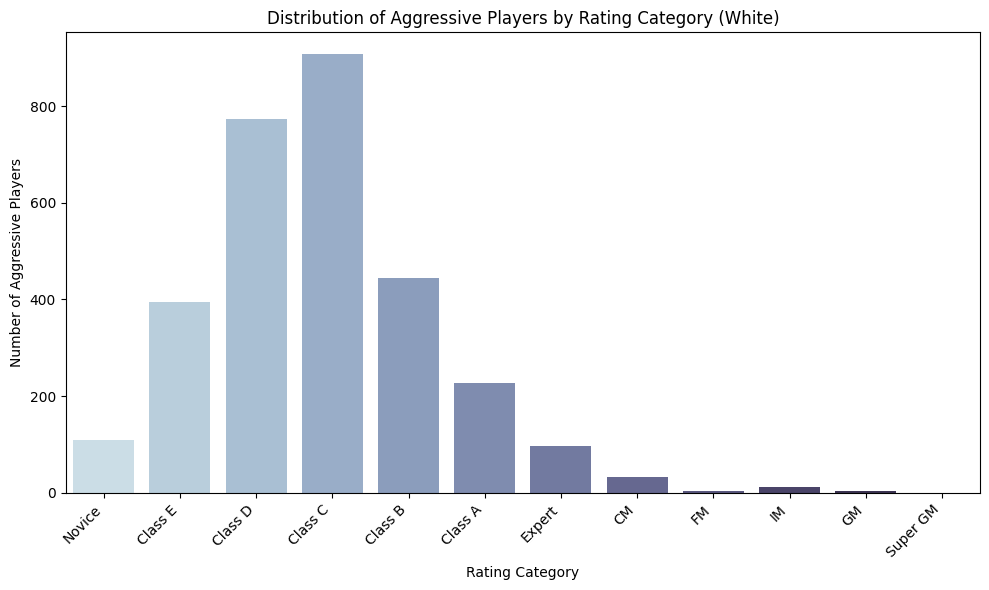

In [14]:
from pickle import TRUE
import seaborn as sns
import matplotlib.pyplot as plt

custom_color_palette = sns.color_palette("ch:s=.25,rot=-.25", as_cmap = TRUE)

aggressive_players = chess_games[chess_games['game_style'] == 'Aggressive']
custom_color_palette = "ch:s=.25,rot=-.25"

# Define the rating order
rating_order = ['Novice', 'Class E', 'Class D', 'Class C', 'Class B', 'Class A', 'Expert', 'CM', 'FM', 'IM', 'GM', 'Super GM']


plt.figure(figsize=(10, 6))
sns.countplot(x='white_category', data=aggressive_players, order=rating_order, palette = custom_color_palette)
plt.title('Distribution of Aggressive Players by Rating Category (White)')
plt.xlabel('Rating Category')
plt.ylabel('Number of Aggressive Players')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

<ipython-input-16-b3e516ecc79c>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = 'white_category', data = aggressive_players, order = rating_order, palette = custom_color_palette)


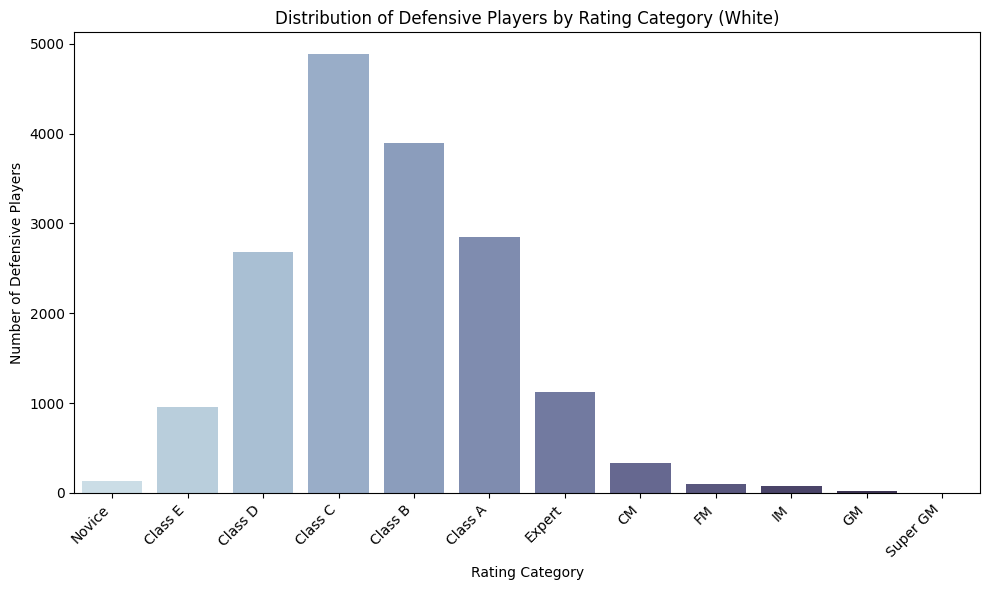

In [16]:
aggressive_players = chess_games[chess_games['game_style'] == 'Defensive']

custom_color_palette = "ch:s=.25,rot=-.25"

plt.figure(figsize = (10, 6))
sns.countplot(x = 'white_category', data = aggressive_players, order = rating_order, palette = custom_color_palette)
plt.title('Distribution of Defensive Players by Rating Category (White)')
plt.xlabel('Rating Category')
plt.ylabel('Number of Defensive Players')
plt.xticks(rotation = 45, ha = 'right')
plt.tight_layout()
plt.show()

<ipython-input-17-5a5c951e217a>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='black_category', data=aggressive_players, order=rating_order, palette = custom_color_palette)


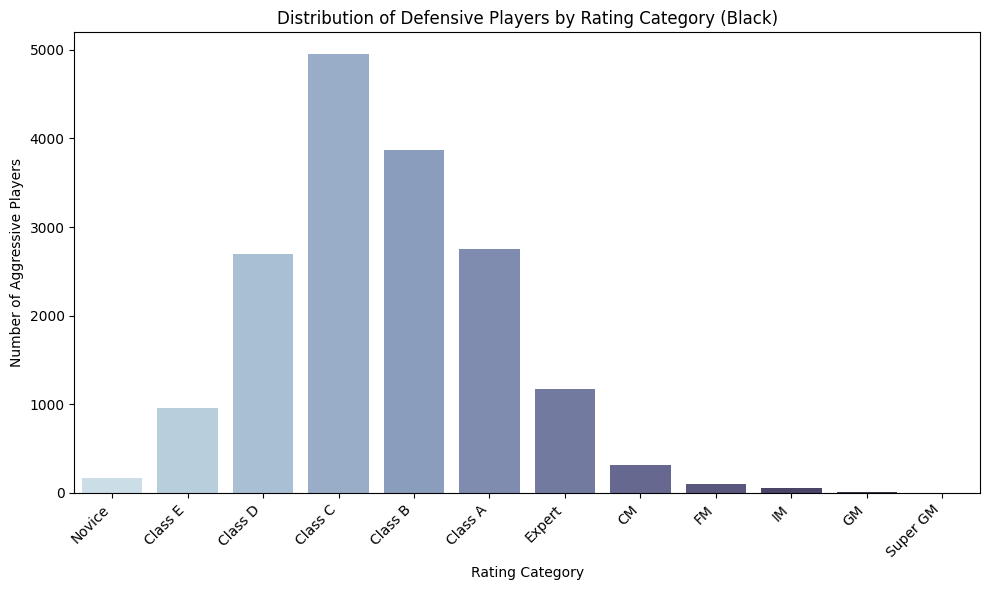

In [17]:
aggressive_players = chess_games[chess_games['game_style'] == 'Defensive']

custom_color_palette = "ch:s=.25,rot=-.25"

plt.figure(figsize=(10, 6))
sns.countplot(x='black_category', data=aggressive_players, order=rating_order, palette = custom_color_palette)
plt.title('Distribution of Defensive Players by Rating Category (Black)')
plt.xlabel('Rating Category')
plt.ylabel('Number of Aggressive Players')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [18]:
#Top 10 most used openings

import plotly.express as px

top_freq = chess_games['opening_name'].value_counts().head(10)

#Top 10 most used openings

import plotly.express as px

top_freq = chess_games['opening_name'].value_counts().head(10)

fig = px.bar(x = top_freq.index, y = top_freq.values,
             title = 'Top 10 Most Frequently Used Chess Openings',
             labels = {'x': 'Opening', 'y': 'Frequency'})

fig.show()

Top 10 Most Frequenctly Used Openings.

This graph does not seem right, because the actual most used opening is not even in the top 10, and this could be due to the fact **variations** are included.

Therefore, we will do this again without the variations.

In [19]:
chess_games['main_opening'] = chess_games['opening_name'].str.split(':').str[0]

top_freq = chess_games['main_opening'].value_counts().head(10)
fig = px.bar(x=top_freq.index, y=top_freq.values,
             title='Top 10 Most Frequently Used Chess Openings (Ignoring Variations)',
             labels={'x': 'Opening', 'y': 'Frequency'})

fig.show()

This graph makes a lot more sense. Looking at this, we can see that Sicilian Defense is the top most frequently used opening, and just from the name itself, this is widely used by Defensive players.

**Let's fact check this.**

In [20]:
import plotly.express as px

sicilian_games = chess_games[chess_games['opening_name'].str.startswith('Sicilian Defense')]

fig = px.bar(sicilian_games,
             x = 'game_style',
             title = 'Game Style Distribution for Sicilian Defense Opening',
             labels = {'game_style': 'Game Style', 'count': 'Number of Games'},
             color = 'game_style')

fig.show()

Defensive players are typically players who played as black.

**Let's fact check this using conditional probability.**

In [21]:
contingency_table = pd.crosstab(chess_games['winner'], chess_games['game_style'])

print(contingency_table)

game_style  Aggressive  Defensive
winner                           
black             1304       7803
draw               129        821
white             1573       8428


In [22]:
# Calculate the conditional probability of a player being defensive given they won as Black
p_defensive_given_black = contingency_table.loc['black', 'Defensive'] / contingency_table.loc['black'].sum()

# Calculate the conditional probability of a player being defensive given they won as White
p_defensive_given_white = contingency_table.loc['white', 'Defensive'] / contingency_table.loc['white'].sum()

# Print the results
print(f"P(Defensive | Black) = {p_defensive_given_black:.2f}")
print(f"P(Defensive | White) = {p_defensive_given_white:.2f}")

P(Defensive | Black) = 0.86
P(Defensive | White) = 0.84


It looks like that the probability Defensive Players given they are playing as Black are **slightly** more than Defenisve Players who played as White.

## I want to predict whether or not Aggressive Players who played as White tend to win more.

But before this...

I want to see which variables are the most influential to the results of the games.

To do this, I will run a few statistical tests.

## Correlation Matrix

In [23]:
# Convert 'winner' column to numerical representation
chess_games['winner_num'] = chess_games['winner'].map({'white': 1, 'black': 0, 'draw': 0.5})

# Select relevant numerical columns for correlation analysis
numerical_cols = ['winner_num', 'white_rating', 'black_rating', 'opening_ply', 'increment_code']
correlation_matrix = chess_games[numerical_cols].corr()

print(correlation_matrix)

                winner_num  white_rating  black_rating  opening_ply  \
winner_num        1.000000      0.141700     -0.166815     0.020669   
white_rating      0.141700      1.000000      0.634171     0.277379   
black_rating     -0.166815      0.634171      1.000000     0.255396   
opening_ply       0.020669      0.277379      0.255396     1.000000   
increment_code    0.005230     -0.070330     -0.077317    -0.034691   

                increment_code  
winner_num            0.005230  
white_rating         -0.070330  
black_rating         -0.077317  
opening_ply          -0.034691  
increment_code        1.000000  


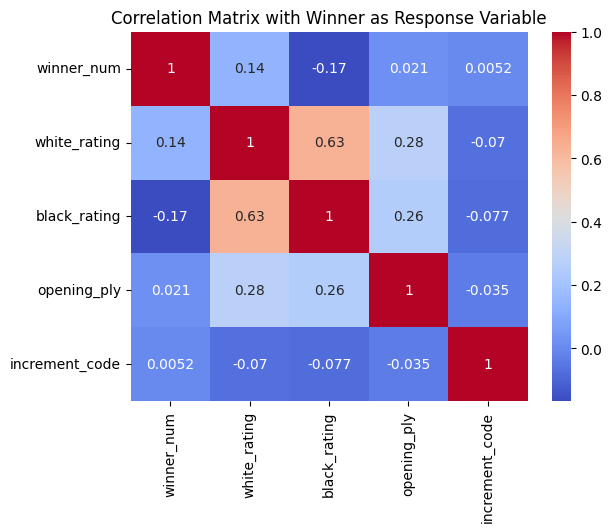

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix with Winner as Response Variable')
plt.show()

In [25]:
encoded_data = pd.get_dummies(chess_games[['game_style', 'winner']])

In [26]:
correlation_matrix = encoded_data.corr()
print(correlation_matrix)

                       game_style_Aggressive  game_style_Defensive  \
game_style_Aggressive               1.000000             -1.000000   
game_style_Defensive               -1.000000              1.000000   
winner_black                       -0.017063              0.017063   
winner_draw                        -0.008793              0.008793   
winner_white                        0.020727             -0.020727   

                       winner_black  winner_draw  winner_white  
game_style_Aggressive     -0.017063    -0.008793      0.020727  
game_style_Defensive       0.017063     0.008793     -0.020727  
winner_black               1.000000    -0.203336     -0.909386  
winner_draw               -0.203336     1.000000     -0.222352  
winner_white              -0.909386    -0.222352      1.000000  


##Chi-Square Test of Interdependence

In [27]:
from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(chess_games['winner'], chess_games['game_style'])

chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-Square Statistic: {chi2_stat}")
print(f"P-value: {p_val}")
print(f"Degrees of Freedom: {dof}")

Chi-Square Statistic: 8.986342941742743
P-value: 0.011185114234874956
Degrees of Freedom: 2


**Null Hypothesis (H0)**: There is no difference in the win rate between aggressive white players and other players (e.g., defensive white players or black players).


**Alternative Hypothesis (H1)**: Aggressive white players have a higher win rate compared to other players.

There is a statistically significant association between the game style (Aggressive vs. Defensive) and the winner of the game. This would provide evidence to support that aggressive white players might tend to win more.

In [28]:
n = contingency_table.sum().sum()  # Total number of observations
phi2 = chi2_stat / n
k = min(contingency_table.shape[0], contingency_table.shape[1])
cramers_v = np.sqrt(phi2 / (k - 1))
print(f"Cramer's V: {cramers_v}")

Cramer's V: 0.021166433218449514


Cramer's V of 0.02 indicates a very weak association between the game style (Aggressive vs. Defensive) and the winner of the game.

This very weak association suggests that there is little to no evidence to support my hypothesis.

The Chi-square test and Cramer's V provide insights into the association between game style and the winner, but they have limitations:

Limited Information: They primarily tell us whether there's a relationship, not the direction or strength of the effect of game style on winning.

Confounding Factors: They don't account for other variables that could be influencing the outcome.

Therefore, I will run Logistic Regression to predict the probability of winning based on game style and other relevant factors:

Player Ratings: Higher-rated players are likely to win more often, regardless of their game style.

Opening Choices: Certain openings might favor aggressive or defensive play, affecting both game style and outcome.

Time Control: Different time controls might encourage different playing styles and influence the results.

In [29]:
chess_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20058 entries, 0 to 20057
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              20058 non-null  object 
 1   victory_status  20058 non-null  object 
 2   winner          20058 non-null  object 
 3   increment_code  20058 non-null  int64  
 4   white_rating    20058 non-null  int64  
 5   black_rating    20058 non-null  int64  
 6   moves           20058 non-null  object 
 7   opening_eco     20058 non-null  object 
 8   opening_name    20058 non-null  object 
 9   opening_ply     20058 non-null  int64  
 10  game_type       20058 non-null  object 
 11  white_category  20058 non-null  object 
 12  black_category  20058 non-null  object 
 13  game_style      20058 non-null  object 
 14  main_opening    20058 non-null  object 
 15  winner_num      20058 non-null  float64
dtypes: float64(1), int64(4), object(11)
memory usage: 2.4+ MB


In [33]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import OneHotEncoder


# Ensure the target column 'winner' exists and is categorical (e.g., 'white', 'black', 'draw')
print(chess_games['winner'].value_counts())

# Convert the target variable to binary: 1 for white wins, 0 for black wins or draws
chess_games['winner_num'] = chess_games['winner'].apply(lambda x: 1 if x == 'white' else 0)

# Define X and y before using them
X = chess_games[['white_rating', 'black_rating', 'opening_ply', 'increment_code', 'game_style']]
y = chess_games['winner_num']

# Create a OneHotEncoder object
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore') # sparse=False for array output

# Fit and transform the 'game_style' column
encoded_game_style = encoder.fit_transform(X[['game_style']])

# Create a DataFrame from the encoded data
encoded_df = pd.DataFrame(encoded_game_style, columns=encoder.get_feature_names_out(['game_style']))

# Concatenate the encoded features with the original DataFrame
X = pd.concat([X, encoded_df], axis=1)

# Drop the original 'game_style' column
X = X.drop('game_style', axis=1)


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Analyze coefficients
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_[0]
})
print("Coefficients:\n", coefficients)

winner
white    10001
black     9107
draw       950
Name: count, dtype: int64
Accuracy: 0.6480558325024925
Classification Report:
               precision    recall  f1-score   support

           0       0.65      0.65      0.65      2008
           1       0.65      0.64      0.65      2004

    accuracy                           0.65      4012
   macro avg       0.65      0.65      0.65      4012
weighted avg       0.65      0.65      0.65      4012

Coefficients:
                  Feature  Coefficient
0           white_rating     0.003516
1           black_rating    -0.003709
2            opening_ply     0.018046
3         increment_code     0.000657
4  game_style_Aggressive     0.138527
5   game_style_Defensive     0.012819


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



Accuracy: The model has an accuracy of about 65%, meaning it correctly predicts the winner (white or not white) about 65% of the time. This is better than random chance (50%), but there's still room for improvement.

Classification Report: The precision, recall, and F1-score are all around 0.65 for both classes (0: black wins or draw, 1: white wins). This indicates that the model performs similarly for both outcomes. There's no significant class imbalance issue.

white_rating: A positive coefficient (0.003516) suggests that higher white player ratings are associated with a higher probability of white winning, as expected. However, the coefficient is quite small, indicating a relatively weak effect.

black_rating: A negative coefficient (-0.003709) suggests that higher black player ratings are associated with a lower probability of white winning, which is also expected. The magnitude is similar to white_rating, indicating a similar strength of effect but in the opposite direction.

opening_ply: A positive coefficient (0.018046) suggests that longer opening phases (more moves) are associated with a higher probability of white winning. This could indicate that white benefits from more complex or slower opening strategies.

increment_code: A positive but very small coefficient (0.000657) suggests that longer time controls might slightly favor white, but the effect is very weak.

game_style_Aggressive: A positive coefficient (0.138527) indicates that aggressive play is associated with a higher probability of white winning. This is the largest coefficient in magnitude, suggesting that aggressive play has the strongest influence among the predictors you included. This supports the initial hypothesis to a greater extent than the Chi-square test indicated.

game_style_Defensive: A positive but much smaller coefficient (0.012819) might seem counterintuitive at first. It suggests that defensive play by white is also associated with a slightly higher probability of white winning, but the effect is weak. This could potentially be due to confounding factors or interactions not captured by the model.

In [34]:
game_style_counts = chess_games['game_style'].value_counts()

fig = px.bar(
    x=game_style_counts.index,
    y=game_style_counts.values,
    title='Count of Aggressive vs. Defensive Players',
    labels={'x': 'Game Style', 'y': 'Count'}
)

fig.show()

I want to make improvements to my logistic regression, so I checked the count for Defensive and Aggressive players.

Here, we can see that Defensive Players is exponentially more than Aggressive Players, which can lead to bias towards Defensive Players, skewed decision boundary (misclassify aggressive players as defensive to avoid larger penalties), and just overall unreliable evaluation metrics.

## Resampling

In [35]:
from sklearn.utils import resample

#separate majority and minority classes
# Use 'aggresive_players' instead of 'aggressive_players'
aggresive_players = chess_games[chess_games['game_style'] == 'Aggressive']
defensive_players = chess_games[chess_games['game_style'] == 'Defensive']

#upsampling minority class
upsampled_aggressive = resample(aggresive_players,
                                replace = True, #sample with replacememt
                                n_samples = len(defensive_players), #matching majority class sizes,
                                random_state = 42)

balanced_chess_games = pd.concat([upsampled_aggressive, defensive_players])

In [36]:
X = balanced_chess_games[['white_rating', 'black_rating', 'opening_ply', 'increment_code', 'game_style']]
y = balanced_chess_games['winner_num']

In [37]:
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

# Fit and transform the 'game_style' column
encoded_game_style = encoder.fit_transform(X[['game_style']])

# Create a DataFrame from the encoded data
# Reset the index of X to ensure it's unique and starts from 0
X = X.reset_index(drop=True)
encoded_df = pd.DataFrame(encoded_game_style, columns=encoder.get_feature_names_out(['game_style']), index=X.index) # Use X.index for encoded_df

# Concatenate the encoded features with the original DataFrame
X = pd.concat([X, encoded_df], axis=1)

# Drop the original 'game_style' column
X = X.drop('game_style', axis=1)

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [39]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_[0]})
print("Coefficients:\n", coefficients)

Accuracy: 0.6609001612666764
Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.64      0.65      3403
           1       0.66      0.68      0.67      3418

    accuracy                           0.66      6821
   macro avg       0.66      0.66      0.66      6821
weighted avg       0.66      0.66      0.66      6821

Coefficients:
                  Feature  Coefficient
0           white_rating     0.003798
1           black_rating    -0.004067
2            opening_ply     0.030152
3         increment_code    -0.000033
4  game_style_Aggressive     0.159354
5   game_style_Defensive     0.041353


Accuracy: The accuracy of 0.66 suggests that the model correctly predicts the winner about 66% of the time. This is slightly better than random chance (50%) and similar to the previous model, indicating a slight improvement after resampling.

Classification Report: The precision, recall, and F1-score are around 0.66-0.67 for both classes (0 and 1). This indicates that the model's performance is relatively balanced for predicting both outcomes (white win or black/draw). There's no significant class imbalance issue after the resampling.

white_rating and black_rating: These coefficients have similar magnitudes but opposite signs, indicating their expected influence on the outcome (higher white rating increases white win probability, and higher black rating decreases it).

opening_ply: The positive coefficient suggests that longer opening phases tend to favor white wins.
increment_code: The coefficient is very close to zero, suggesting that time control has minimal influence.

game_style_Aggressive: The positive and relatively large coefficient suggests that aggressive play is associated with a higher probability of white winning.

game_style_Defensive: The positive coefficient for the defensive style might still seem counterintuitive.

## Concerns and Improvements:

* I believe Logistic Regression is limited, and Decision Tree may provide better outcome
* The sample size might be too small, considering the fact we have billions of data on chess.
* The imbalance between aggressive and defensive players might be a sampling issue, or just that we do not have enough players that have the aggressive style.
